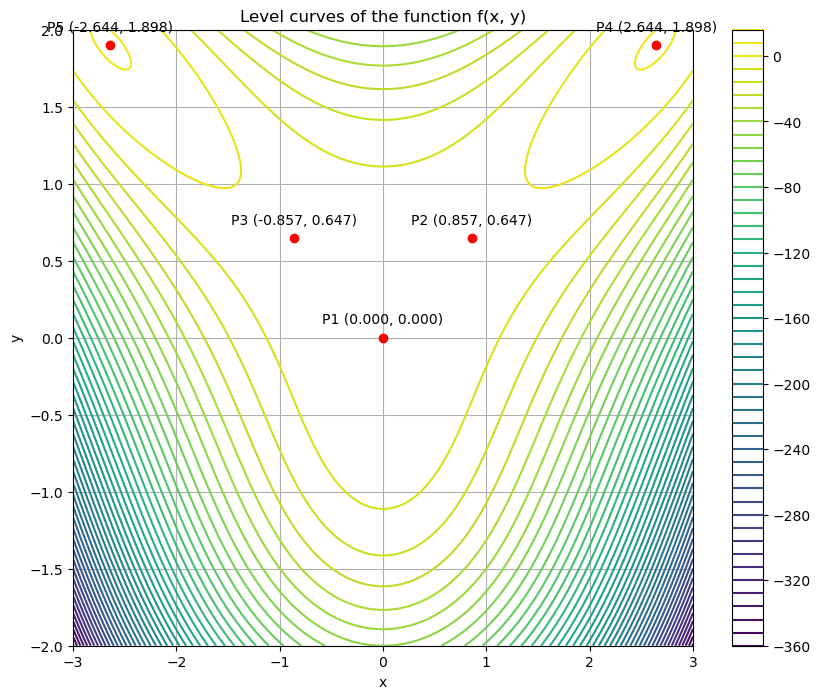

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return 10*x**2*y - 5*x**2 - 4*y**2 - x**4 - 2*y**4


x = np.linspace(-3, 3, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Critical points
critical_points = [(0, 0), (0.857, 0.647), (-0.857, 0.647), (2.644, 1.898), (-2.644, 1.898)]

# Plotting
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=50, cmap='viridis')  
plt.colorbar(cp)  
plt.title('Level curves of the function f(x, y)')
plt.xlabel('x')
plt.ylabel('y')

# Mark critical points
for (cx, cy) in critical_points:
    plt.plot(cx, cy, 'ro')  

# Annotations for critical points
for i, (cx, cy) in enumerate(critical_points, start=1):
    plt.annotate(f'P{i} ({cx:.3f}, {cy:.3f})', (cx, cy), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Define the matrix A
A = np.array([[2, 1, 2, 6],
              [6, 4, 3, 5],
              [8, 1, 4, 9],
              [9, 8, 7, 8]])

# Function to calculate the determinant using Laplace expansion
def laplace_expansion(matrix):
    # Base case for 2x2 matrix
    if matrix.shape[0] == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    
    # Recursive case
    det = 0
    for col in range(matrix.shape[1]):
        # Get the submatrix by removing the first row and the current column
        sub_matrix = np.delete(np.delete(matrix, 0, axis=0), col, axis=1)
        # Calculate the minor's determinant recursively
        minor_det = laplace_expansion(sub_matrix)
        # Add to the determinant using the cofactor expansion formula
        det += ((-1)**(col)) * matrix[0, col] * minor_det
    
    return det

# Calculate determinant using the Laplace expansion
det_laplace = laplace_expansion(A)
# Calculate determinant using numpy function
det_numpy = np.linalg.det(A)

print(f"Determinant calculated via Laplace expansion: {det_laplace}")
print(f"Determinant calculated via NumPy's function: {det_numpy:.0f}")


Determinant calculated via Laplace expansion: 229
Determinant calculated via NumPy's function: 229


In [3]:
import numpy as np

# Define the matrix A
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Characteristic polynomial and eigenvalues
characteristic_poly = np.poly(A)  # coefficients of the characteristic polynomial

# Check if A is positive definite
# A matrix is positive definite if all its eigenvalues are positive
is_positive_definite = np.all(eigenvalues > 0)

# Condition number of A
# Condition number is used to measure the sensitivity of the solution of a system of linear equations
condition_number = np.linalg.cond(A)

print("Eigenvalues of A:", eigenvalues)
print("Characteristic Polynomial Coefficients:", characteristic_poly)
print("Is the matrix A positive definite?:", is_positive_definite)
print("Condition number of the matrix A:", condition_number)

# Plotting eigenvalues if required or any additional analysis


Eigenvalues of A: [3.41421356 2.         0.58578644]
Characteristic Polynomial Coefficients: [ 1. -6. 10. -4.]
Is the matrix A positive definite?: True
Condition number of the matrix A: 5.828427124746193


In [4]:
import numpy as np
from numpy.linalg import svd, matrix_rank, norm, lstsq

# Define the matrix A
A = np.array([
    [6, 5, 3],
    [4, 1, 5],
    [6, 3, 6],
    [5, 3, 6],
    [6, 6, 3]
])

# Vector b
b = np.array([-1, 2, 0, 3, 1])

# Task 1: Singular values of A
U, singular_values, Vt = svd(A)  # SVD decomposition

# Task 2: Eigenvalues of A^T A
ATA = A.T @ A  # A transpose times A
eigenvalues_ATA = np.linalg.eigvals(ATA)  # Eigenvalues of A^T A

# Task 3: Rank of A
rank_A = matrix_rank(A)

# Task 4: Solution to Ax = b and its uniqueness
x, residuals, rank, s = lstsq(A, b, rcond=None)  # Least squares solution to Ax = b
is_unique_solution = rank_A == A.shape[1]  # Solution is unique if rank of A equals the number of columns

# Task 5: Check for solution existence and uniqueness
is_solution = residuals.size == 0 or np.allclose(residuals, 0)

print("Singular values of A:", singular_values)
print("Eigenvalues of A^T A:", eigenvalues_ATA)
print("Rank of A:", rank_A)
print("Solution x to Ax = b:", x)
print("Is the solution unique?:", is_unique_solution)
print("Does a solution exist for the given b?:", is_solution)
print("Residuals of the least squares solution (if any):", residuals)


Singular values of A: [17.92667464  4.69961929  0.74021274]
Eigenvalues of A^T A: [321.36566366   0.54791491  22.08642144]
Rank of A: 3
Solution x to Ax = b: [-2.06119825  1.37336076  1.54641296]
Is the solution unique?: True
Does a solution exist for the given b?: False
Residuals of the least squares solution (if any): [2.62766778]


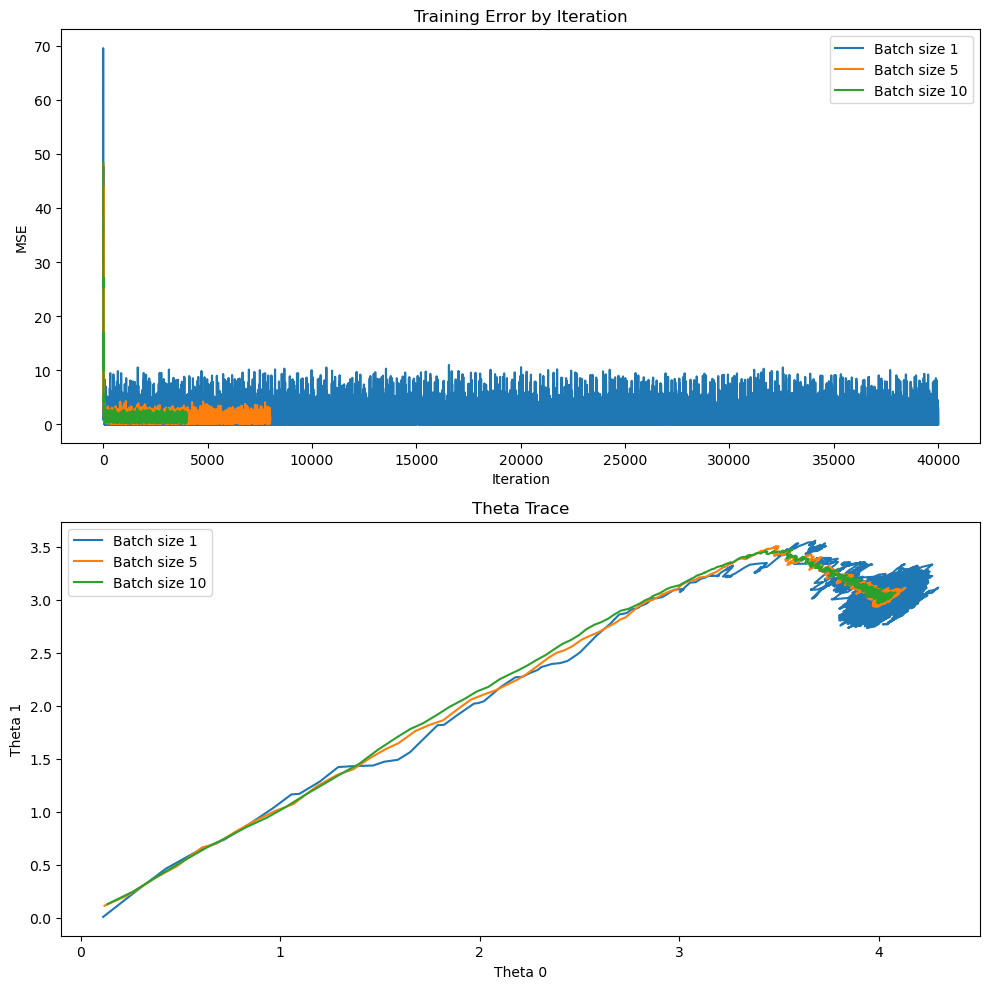

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
X = pd.read_csv('X.csv', header=None).values
y = pd.read_csv('y.csv', header=None).values

# Add a column of ones to X to account for the intercept term (θ0)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Define the mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, batch_size, learning_rate=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []
    theta_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            predictions = X_i.dot(theta)
            errors = predictions - y_i.squeeze()
            gradients = 2/batch_size * X_i.T.dot(errors)

            theta -= learning_rate * gradients

            # Calculate the Mean Squared Error (MSE)
            loss = (errors ** 2).mean()
            loss_history.append(loss)
            theta_history.append(theta.copy())

    return theta, loss_history, theta_history

# Set parameters for the gradient descent
learning_rate = 0.01
epochs = 200

# Perform gradient descent with different batch sizes
batch_sizes = [1, 5, 10]
results = {}

for batch_size in batch_sizes:
    theta, loss_history, theta_history = mini_batch_gradient_descent(X, y, batch_size, learning_rate, epochs)
    results[batch_size] = {
        'theta': theta,
        'loss_history': loss_history,
        'theta_history': theta_history
    }

# Plotting the training errors and theta values
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
for batch_size in batch_sizes:
    ax = axes[0]
    ax.plot(results[batch_size]['loss_history'], label=f'Batch size {batch_size}')
    ax.set_title('Training Error by Iteration')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    ax.legend()

    ax = axes[1]
    theta_history = np.array(results[batch_size]['theta_history'])
    ax.plot(theta_history[:, 0], theta_history[:, 1], label=f'Batch size {batch_size}')
    ax.set_title('Theta Trace')
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.legend()

plt.tight_layout()
plt.show()

